In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from utils.sigmoid_regression import sigmoid

rows_count, col_count = 10000, 1

w_1 = 1.4

noise_strength = 0.1

X = 8 * np.random.rand(rows_count, col_count) - 4

y = sigmoid(w_1 * X)
y = y.flatten()

y += np.random.normal(0, noise_strength, size=rows_count)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

y_train = y_train[:, np.newaxis]

In [3]:
from utils.sigmoid_regression import mse, forward, train_sigmoid_regressor

losses, parameters, gradients, current_parameters = train_sigmoid_regressor(X_train, y_train, lr=0.0004)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 0.165316
Epoch 1, loss: 0.034093
Epoch 2, loss: 0.024345
Epoch 3, loss: 0.020028
Epoch 4, loss: 0.017542
Epoch 5, loss: 0.015917
Epoch 6, loss: 0.014773
Epoch 7, loss: 0.013925
Epoch 8, loss: 0.013274
Epoch 9, loss: 0.012759
Epoch 10, loss: 0.012343
Epoch 11, loss: 0.012001
Epoch 12, loss: 0.011716
Epoch 13, loss: 0.011476
Epoch 14, loss: 0.011271
Epoch 15, loss: 0.011094
Epoch 16, loss: 0.010941
Epoch 17, loss: 0.010808
Epoch 18, loss: 0.010691
Epoch 19, loss: 0.010587
Epoch 20, loss: 0.010496
Epoch 21, loss: 0.010414
Epoch 22, loss: 0.010341
Epoch 23, loss: 0.010275
Epoch 24, loss: 0.010216
Epoch 25, loss: 0.010163
Epoch 26, loss: 0.010114
Epoch 27, loss: 0.010070
Epoch 28, loss: 0.010030
Epoch 29, loss: 0.009994
Epoch 30, loss: 0.009961


In [4]:
y_pred = forward(X_test, current_parameters)
print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Parameters: {current_parameters[0]}')

Mean Squared Error: 0.3211014484287457
Parameters: [1.21356596]


In [5]:
parameters = np.array(parameters)
parameters = np.moveaxis(parameters, 1, 2)

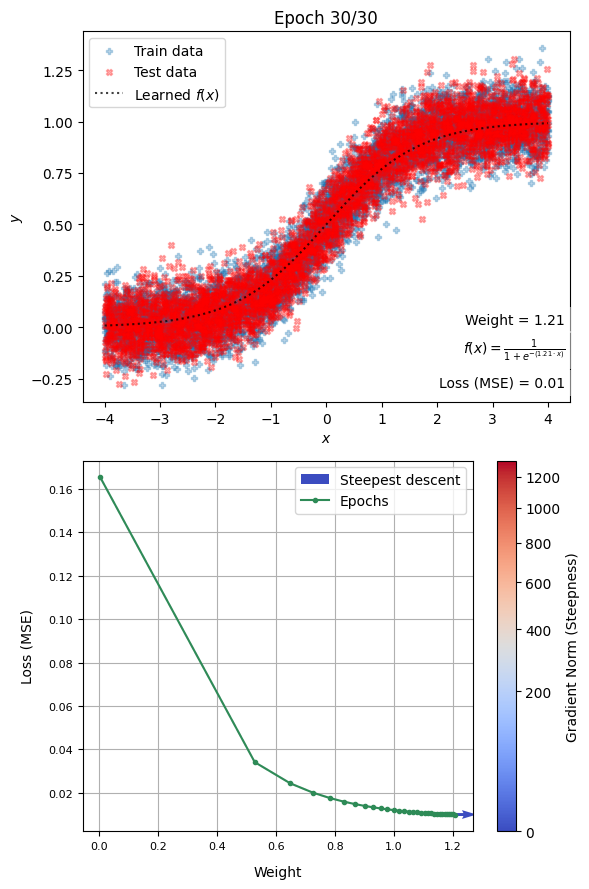

In [6]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_2D_loss
from utils.sigmoid_regression import plot_2D_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

def plot_text(epoch_parameters, epoch_loss, text_w1, _, text_fn, text_loss):
    text_w1.set_position((0.95, 0.63))
    text_fn.set_position((0.95, 0.59))
    text_loss.set_position((0.95, 0.56))
    
    text_w1.set_text(rf'Weight = {epoch_parameters[0]:.2f}')
    text_fn.set_text(rf'$f(x) = \frac{{1}}{{1 + e^{{-({epoch_parameters[0]:.2f} \cdot x)}}}}$')
    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')

    ax1.legend(loc='upper left')
    
    ax2.set_xlabel('Weight', labelpad=10)
    ax2.set_ylabel('Loss (MSE)', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_2D_model,
    plot_2D_loss,
    plot_text,
    plot_other
)

In [7]:
from utils.plot_training import save_animation

experiment_name = '2D_sigmoid_regression'
save_animation(frame_buffers, experiment_name)